In [1]:
!pip install keras
!pip install msgpack
!pip install tensorflow
!pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
import os, shutil
import matplotlib.pyplot as plt
from keras.preprocessing import image
from matplotlib.pyplot import imshow
from keras.applications.imagenet_utils import decode_predictions
from keras.applications import VGG16
from keras.applications import VGG16
from keras import layers, models, optimizers
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# original_dataset_dir = '/media/hdd/wtf/dogs-vs-cats/kaggle_original_data/train'
base_dir = './cats_dogs_images'

train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
print('total training images:', len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))
print('total validation images:', len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir)))
print('total test images:', len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir)))

total training images: 1600
total validation images: 400
total test images: 400


In [5]:
def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

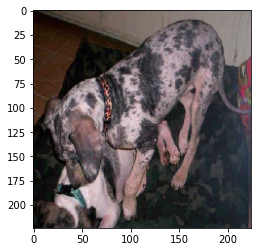

In [6]:
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
img_path = fnames[1] # Choose one image to view
img = image.load_img(img_path, target_size=(224, 224)) # load image and resize it
x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

plt.imshow(image.array_to_img(x[0]))

In [7]:
model = VGG16(weights='imagenet', include_top=True)

features = model.predict(x)
decode_predictions(features, top=10)

[[('n02109047', 'Great_Dane', 0.8541551),
  ('n02091134', 'whippet', 0.07830327),
  ('n02100236', 'German_short-haired_pointer', 0.019077588),
  ('n02108089', 'boxer', 0.013210363),
  ('n02108422', 'bull_mastiff', 0.0039671585),
  ('n02088632', 'bluetick', 0.0031541141),
  ('n02093428', 'American_Staffordshire_terrier', 0.0025007422),
  ('n02091032', 'Italian_greyhound', 0.0019649772),
  ('n02110341', 'dalmatian', 0.0017278431),
  ('n02108915', 'French_bulldog', 0.0016748819)]]

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(224, 224, 3))

conv_base.summary()

In [ ]:
#Build a model

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
# Lets create a generator for the images

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary')

In [ ]:
#Train data

history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # batches in the generator are 50, so it takes 320 batches to get to 16000 images
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # batches in the generator are 50, so it takes 90 batches to get to 4500 images

In [ ]:
plot_accuracy_and_loss(history)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

In [ ]:
# # Transfer learning / Fine tune model

# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# # The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(224, 224), # resize all images to 150 x 150
#     batch_size=50,
#     class_mode='binary') # because we use binary_crossentropy loss we need binary labels

# validation_generator = test_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(224, 224), # resize all images to 150 x 150
#     batch_size=50,
#     class_mode='binary')

In [ ]:
# classifier.summary()

In [ ]:
# img1 = image.load_img('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/test/cats/cat.865.jpg', target_size=(64, 64))
# img = image.img_to_array(img1)
# img = img/255

# img = np.expand_dims(img, axis=0)
# prediction = classifier.predict(img, batch_size=None,steps=1)
# if(prediction[:,:]>0.5):
#     value ='Dog :%1.2f'%(prediction[0,0])
#     plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
# else:
#     value ='Cat :%1.2f'%(1.0-prediction[0,0])
#     plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

# plt.imshow(img1)
# plt.show()

In [ ]:
# test_set.reset
# ytesthat = classifier.predict_generator(test_set, steps=13)
# df = pd.DataFrame({
#     'filename':test_set.filenames,
#     'predict':ytesthat[:,0],
#     'y':test_set.classes
# })

In [ ]:
# x1 = classifier.evaluate_generator(training_set, steps=1)
# x2 = classifier.evaluate_generator(test_set, steps=1)
# print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
# print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

In [ ]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# df['y_pred'] = df['predict']>0.5
# df.y_pred = df.y_pred.astype(int)
# df.tail(10)

In [ ]:
# misclassified = df[df['y']!=df['y_pred']]
# print('Total misclassified image from 400 Validation images : %d'%misclassified['y'].count())

In [ ]:
# conf_matrix = confusion_matrix(df.y,df.y_pred)
# sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
# plt.xlabel('predicted value')
# plt.ylabel('true value');

In [ ]:
# CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
# fig=plt.figure(figsize=(15, 6))
# columns = 6
# rows = 1
# for i in range(1,10):
#     img = image.load_img('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/test/'+ CatasDog.iloc[i], target_size=(64, 64))
#     fig.add_subplot(rows+1, columns, i+1)
#     plt.imshow(img)
# plt.show()

In [ ]:
# DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
# fig=plt.figure(figsize=(15, 6))
# columns = 7
# rows = 3
# for i in range(columns*rows):
#     img = image.load_img('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/test/'+DogasCat.iloc[i], target_size=(64, 64))
#     fig.add_subplot(rows, columns, i+1)
#     plt.imshow(img)
# plt.show()

In [ ]:
# fig=plt.figure(figsize=(15, 6))
# columns = 7
# rows = 3
# files = os.listdir('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/tester/')
# for i in range(columns*rows):
#     index = random.randrange(0, len(files))
#     fig.add_subplot(rows, columns, i+1)
#     img1 = image.load_img('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/tester/'+ files[index], 
#                           target_size=(64, 64))
#     img = image.img_to_array(img1)
#     img = img/255
#     img = np.expand_dims(img, axis=0)
#     prediction = classifier.predict(img, batch_size=None,steps=1)
#     if(prediction[:,:]>0.5):
#         value ='Dog :%1.2f'%(prediction[0,0])
#         plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
#     else:
#         value ='Cat :%1.2f'%(1.0-prediction[0,0])
#         plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
#     plt.imshow(img1)